<a href="https://colab.research.google.com/github/Faareh-Ahmed/HandwrittenDigitClassifier/blob/main/HandwrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Loading the Dataset MNIST

In [49]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [57]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [58]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [27]:
def plot_sample_images(images, labels, sample_size=10):
    plt.figure(figsize=(10, 10))
    for i in range(sample_size):
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

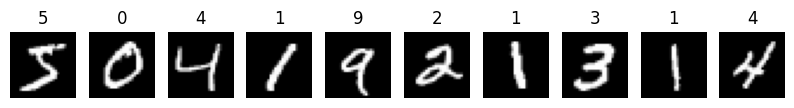

In [29]:
plot_sample_images(X_train, y_train, sample_size=10)

# Normalizing Pixel Values
The images in this dataset are grayscale images and are not rgb
The grayscale images range from 0 to 255 values so we normalize them

In [59]:
X_train = X_train / 255
X_test = X_test / 255

# Reshape it to add Channel for CNN model

In [60]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [61]:
X_train.shape

(60000, 28, 28, 1)

In [62]:
X_test.shape

(10000, 28, 28, 1)

# Convert labels into Categories using One-Hot encoding

In [64]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [65]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Define the Model

In [69]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [74]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, name):
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    path_cp = name + '_weights.h5'
    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1,
                            min_delta=1e-4, min_lr=1e-4, mode='min', cooldown=1)
    ckp = ModelCheckpoint(path_cp, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    es = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=7, mode='min', restore_best_weights=True, verbose=1)

    # Fitting the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        verbose=1,
                        callbacks=[rlr, es, ckp])

    return history

# Train Model

In [75]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [76]:
history = train_model(model, X_train, y_train, X_test, y_test, epochs=20, name='mnist_cnn')


Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9566
Epoch 1: val_loss improved from inf to 0.06924, saving model to mnist_cnn_weights.h5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1458 - accuracy: 0.9566 - val_loss: 0.0692 - val_accuracy: 0.9785 - lr: 0.0010
Epoch 2/20
   7/1875 [..............................] - ETA: 42s - loss: 0.0754 - accuracy: 0.9866

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9855
Epoch 2: val_loss improved from 0.06924 to 0.03893, saving model to mnist_cnn_weights.h5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0389 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 3/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9893
Epoch 3: val_loss did not improve from 0.03893
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0407 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9921
Epoch 4: val_loss did not improve from 0.03893
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0462 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 5/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy:

# Evaluate Model

In [78]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0331 - accuracy: 0.9899
Test Loss: 0.03306511417031288
Test Accuracy: 0.9898999929428101


In [82]:
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 8ms/step


# Plotting Results

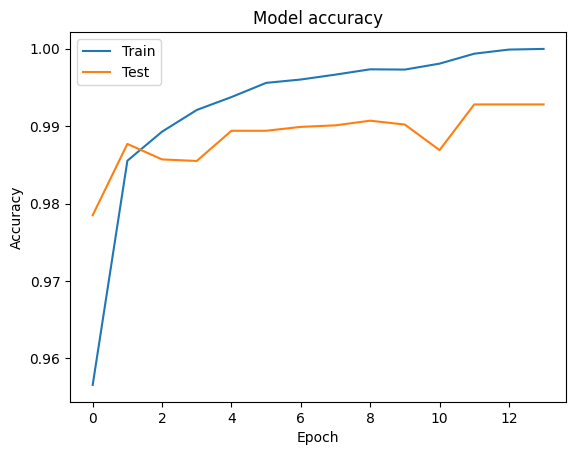

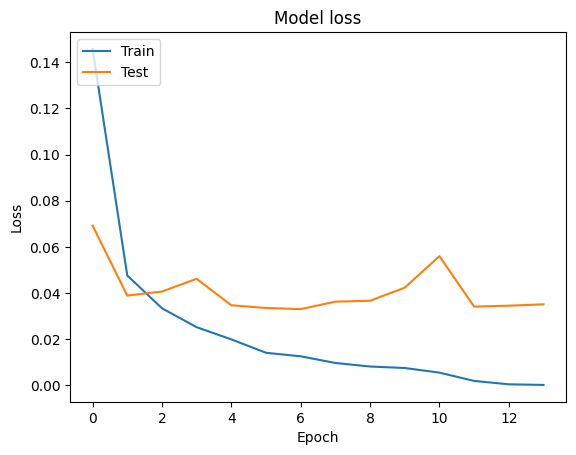

In [80]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix

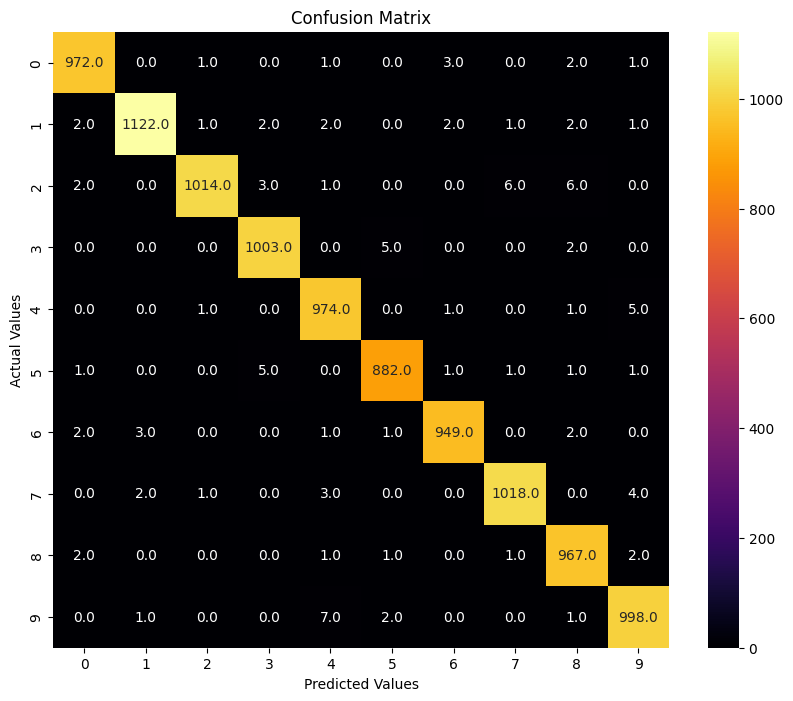

In [83]:
conf_matrix = confusion_matrix(y_test_label, y_pred_label)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="inferno", square=True,
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()